## Tree selection and spasce placement

The first RL model that I think that we can use would be a model that first place trees and then label the ground

Assuming our action space is the following:

Trees
- Open Canopy
- Intermediate Canopy
- Radius is random? IDK I don't see it in the data

First calculate what is the average amount of sunlight in an area from the shrub collection
- if all are low, then all spots should be classified as full shade
- if there are some semi-shade/no shade, then we will clasiffy the spots using the radius from the tree

The question then become how do we select the radius for each shade cover? 
- Problem 1, radius should be associated with the type of tree
    - Counter argument, selecting radius within a certain distribution could lead to more varying kinds of generation
- let's set the radius to be around 15 units to about 25 units/ either or


ie the goals will be to select for each tree planting spot, either 
- an intermediate canopy or open canopy plant
- Setting the shading radius it provides to either 15 or 25 units

- reward the model for planting more species (based on the theme)


What will its actions be, given that each tree can either fit into interediate canopy or open canopy

Imma assume that I will accept 0 to 3 trees, therefore for each category there are the following situatoin
- No trees of that type
- 1 tree of that type
- 2 or 3 trees of that type


Therefore,
inputs
- list of 6 plants that could be a mixture of shrubs/trees
- theme of what is the surrounding
- Tree coordinates and shrub coordinates

prep
- Interpret the list of figure out how many of each type of each tree there are 
- Preemptively label the trees randomly to create a 50/50
- Given that label them 1a, 1b, 2a, 2b , 3a, 3b accordingly so that it can be generalised to type of plant choice first


## The first step

Create a function to help me extract number of plants and shrubs from the example data and create fake selection of plants

In [2]:
exampleData = {'response': '200', 'api_resp': [{'_index': 'flora', '_id': 'Ucz7y5IBzYt0LoDihG73', '_score': 4.886512, '_source': {'Scientific Name': 'Horsfieldia irya (Gaertn.) Warb.', 'Common Name': 'Pianggu', 'Species ID': 2964, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/2/9/2964', 'Plant Type': ['Tree'], 'Light Preference': ['Full Sun'], 'Water Preference': ['Lots of Water', 'Moderate Water'], 'Drought Tolerant': False, 'Native to SG': True, 'Fruit Bearing': False, 'Fragrant Plant': True, 'Maximum Height (m)': 30.0, 'Flower Colour': 'Orange, Yellow / Golden', 'Hazard': 'N/A', 'Attracted animals': 'Bird-Attracting (Fruits)', 'Native habitat': 'Terrestrial (Primary Rainforest, Coastal Forest, Riverine, Secondary Rainforest, Freshwater Swamp Forest), Shoreline (Mangrove Forest)', 'Mature Leaf Colour': 'Green', 'Young Flush Leaf Colour': 'N/A', 'Leaf Area Index': '3.0 (Tree - Intermediate Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'Fissured, Cracked', 'Trunk Colour': 'red', 'Leaf Texture': ['N/A']}}, {'_index': 'flora', '_id': 'U8z7y5IBzYt0LoDihG73', '_score': 1.0320289, '_source': {'Scientific Name': 'Parkia speciosa Hassk.', 'Common Name': 'Petai', 'Species ID': 3052, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/3/0/3052', 'Plant Type': ['Tree'], 'Light Preference': ['Full Sun'], 'Water Preference': ['Moderate Water'], 'Drought Tolerant': False, 'Native to SG': True, 'Fruit Bearing': False, 'Fragrant Plant': True, 'Maximum Height (m)': 45.0, 'Flower Colour': 'Cream / Off-White, White, Yellow / Golden', 'Hazard': 'N/A', 'Attracted animals': 'Bird-Attracting, Butterfly Host Plant, Bat Food', 'Native habitat': 'Terrestrial (Primary Rainforest, Secondary Rainforest, Riverine)', 'Mature Leaf Colour': 'Green', 'Young Flush Leaf Colour': 'N/A', 'Leaf Area Index': '2.5 (Tree - Open Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'smooth', 'Trunk Colour': 'reddish-brown', 'Leaf Texture': ['N/A']}}, {'_index': 'flora', '_id': 'WMz7y5IBzYt0LoDihG73', '_score': 1.0320289, '_source': {'Scientific Name': 'Cassia grandis L. f.', 'Common Name': 'Horse Cassia', 'Species ID': 2788, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/2/7/2788', 'Plant Type': ['Tree'], 'Light Preference': ['Full Sun'], 'Water Preference': ['Moderate Water'], 'Drought Tolerant': False, 'Native to SG': False, 'Fruit Bearing': False, 'Fragrant Plant': None, 'Maximum Height (m)': 25.0, 'Flower Colour': 'Orange, Pink, Red', 'Hazard': 'N/A', 'Attracted animals': 'N/A', 'Native habitat': 'Terrestrial (Riverine)', 'Mature Leaf Colour': 'Green, Purple', 'Young Flush Leaf Colour': 'N/A', 'Leaf Area Index': '2.5 (Tree - Open Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'Smooth', 'Trunk Colour': 'Light grey', 'Leaf Texture': ['N/A']}}, {'_index': 'flora', '_id': 'Wcz7y5IBzYt0LoDihG73', '_score': 1.0320289, '_source': {'Scientific Name': 'Cratoxylum cochinchinense (Lour.) Blume', 'Common Name': 'Derum Selunchor', 'Species ID': 2829, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/2/8/2829', 'Plant Type': ['Shrub', 'Tree'], 'Light Preference': ['Full Sun', 'Semi Shade'], 'Water Preference': ['Moderate Water'], 'Drought Tolerant': False, 'Native to SG': True, 'Fruit Bearing': False, 'Fragrant Plant': True, 'Maximum Height (m)': 30.0, 'Flower Colour': 'Red, Orange, Pink', 'Hazard': 'N/A', 'Attracted animals': 'Butterfly Host Plant (Leaves, Associated with: Eurema  hecabe contubernalis (Moore, 1886), Lexias pardalis), Bee-Attracting', 'Native habitat': 'Terrestrial (Secondary Rainforest, Primary Rainforest, Freshwater Swamp Forest)', 'Mature Leaf Colour': 'Green', 'Young Flush Leaf Colour': 'Red', 'Leaf Area Index': '3.0 (Tree - Intermediate Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'Peeling / Flaking / Papery, Smooth', 'Trunk Colour': 'Reddish-brown', 'Leaf Texture': ['Medium']}}, {'_index': 'flora', '_id': 'W8z7y5IBzYt0LoDihG73', '_score': 1.0320289, '_source': {'Scientific Name': 'Corymbia ptychocarpa (F. Muell.) K. D. Hill & L. A. S. Johnson', 'Common Name': 'Spring Bloodwood', 'Species ID': 2887, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/2/8/2887', 'Plant Type': ['Tree'], 'Light Preference': ['Full Sun'], 'Water Preference': ['Lots of Water', 'Moderate Water'], 'Drought Tolerant': False, 'Native to SG': False, 'Fruit Bearing': False, 'Fragrant Plant': None, 'Maximum Height (m)': 20.0, 'Flower Colour': 'Pink, Red', 'Hazard': 'N/A', 'Attracted animals': 'Bird-Attracting', 'Native habitat': 'Terrestrial (Secondary Rainforest, Riverine)', 'Mature Leaf Colour': 'Green', 'Young Flush Leaf Colour': 'N/A', 'Leaf Area Index': '3.0 (Tree - Intermediate Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'Fissured', 'Trunk Colour': 'Reddish-brown to greyish-brown', 'Leaf Texture': ['N/A']}}, {'_index': 'flora', '_id': 'XMz7y5IBzYt0LoDihG73', '_score': 1.0320289, '_source': {'Scientific Name': 'Cola gigantea A.Chev.', 'Common Name': 'Giant Cola', 'Species ID': 2821, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/2/8/2821', 'Plant Type': ['Tree'], 'Light Preference': ['Full Sun'], 'Water Preference': ['Moderate Water'], 'Drought Tolerant': False, 'Native to SG': False, 'Fruit Bearing': False, 'Fragrant Plant': None, 'Maximum Height (m)': 35.0, 'Flower Colour': 'Purple', 'Hazard': 'N/A', 'Attracted animals': 'N/A', 'Native habitat': 'Terrestrial', 'Mature Leaf Colour': 'Green', 'Young Flush Leaf Colour': 'N/A', 'Leaf Area Index': '3.0 (Tree - Intermediate Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'brown', 'Trunk Colour': 'brown', 'Leaf Texture': ['N/A']}}, {'_index': 'flora', '_id': 'Xcz7y5IBzYt0LoDihG73', '_score': 1.0320289, '_source': {'Scientific Name': 'Erythrina fusca Lour.', 'Common Name': 'Coral Tree', 'Species ID': 2879, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/2/8/2879', 'Plant Type': ['Tree'], 'Light Preference': ['Full Sun'], 'Water Preference': ['Moderate Water'], 'Drought Tolerant': False, 'Native to SG': False, 'Fruit Bearing': False, 'Fragrant Plant': None, 'Maximum Height (m)': 15.0, 'Flower Colour': 'Orange, Red', 'Hazard': 'Spines/Thorns - Stem/Branch, Spines/Thorns - Trunk, Toxic Upon Ingestion', 'Attracted animals': 'N/A', 'Native habitat': 'Terrestrial (Coastal Forest, Riverine), Shoreline (Sandy Beach)', 'Mature Leaf Colour': 'Green', 'Young Flush Leaf Colour': 'N/A', 'Leaf Area Index': '3.0 (Tree - Intermediate Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'Peeling / Flaking / Papery', 'Trunk Colour': 'Brownish grey, brown', 'Leaf Texture': ['N/A']}}, {'_index': 'flora', '_id': 'X8z7y5IBzYt0LoDihG73', '_score': 1.0320289, '_source': {'Scientific Name': 'Samanea saman (Jacq.) Merr.', 'Common Name': 'Rain Tree', 'Species ID': 3106, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/3/1/3106', 'Plant Type': ['Tree'], 'Light Preference': ['Full Sun'], 'Water Preference': ['Moderate Water'], 'Drought Tolerant': False, 'Native to SG': False, 'Fruit Bearing': False, 'Fragrant Plant': None, 'Maximum Height (m)': 30.0, 'Flower Colour': 'Pink, White', 'Hazard': 'N/A', 'Attracted animals': 'N/A', 'Native habitat': 'Terrestrial (Primary Rainforest, Grassland / Savannah/ Scrubland)', 'Mature Leaf Colour': 'Green', 'Young Flush Leaf Colour': 'N/A', 'Leaf Area Index': '2.5 (Tree - Open Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'Fissured', 'Trunk Colour': 'Dark brown', 'Leaf Texture': ['N/A']}}, {'_index': 'flora', '_id': 'ZMz7y5IBzYt0LoDihG73', '_score': 1.0320289, '_source': {'Scientific Name': 'Xanthostemon chrysanthus (F.Muell.) Benth.', 'Common Name': 'Golden Penda', 'Species ID': 3200, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/3/2/3200', 'Plant Type': ['Tree'], 'Light Preference': ['Full Sun'], 'Water Preference': ['Lots of Water', 'Moderate Water'], 'Drought Tolerant': False, 'Native to SG': False, 'Fruit Bearing': False, 'Fragrant Plant': None, 'Maximum Height (m)': 40.0, 'Flower Colour': 'Yellow / Golden', 'Hazard': 'N/A', 'Attracted animals': 'Bird-Attracting, Butterfly-Attracting, Bee-Attracting', 'Native habitat': 'Terrestrial (Primary Rainforest, Secondary Rainforest)', 'Mature Leaf Colour': 'Green', 'Young Flush Leaf Colour': 'Red', 'Leaf Area Index': '3.0 (Tree - Intermediate Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'Scaly, Smooth', 'Trunk Colour': 'Brown', 'Leaf Texture': ['N/A']}}, {'_index': 'flora', '_id': 'Zsz7y5IBzYt0LoDihG73', '_score': 1.0320289, '_source': {'Scientific Name': 'Sterculia macrophylla Vent.', 'Common Name': 'Broad-leaved Sterculia', 'Species ID': 3138, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/3/1/3138', 'Plant Type': ['Tree'], 'Light Preference': ['Full Sun'], 'Water Preference': ['Lots of Water', 'Moderate Water'], 'Drought Tolerant': False, 'Native to SG': True, 'Fruit Bearing': False, 'Fragrant Plant': None, 'Maximum Height (m)': 40.0, 'Flower Colour': 'Yellow / Golden, Pink', 'Hazard': 'N/A', 'Attracted animals': 'Bird-Attracting', 'Native habitat': 'Terrestrial (Primary Rainforest, Secondary Rainforest, Freshwater Swamp Forest)', 'Mature Leaf Colour': 'Green', 'Young Flush Leaf Colour': 'Red', 'Leaf Area Index': '3.0 (Tree - Intermediate Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'smooth', 'Trunk Colour': 'light grey', 'Leaf Texture': ['N/A']}}]}

In [4]:
print(exampleData['api_resp'])

[{'_index': 'flora', '_id': 'Ucz7y5IBzYt0LoDihG73', '_score': 4.886512, '_source': {'Scientific Name': 'Horsfieldia irya (Gaertn.) Warb.', 'Common Name': 'Pianggu', 'Species ID': 2964, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/2/9/2964', 'Plant Type': ['Tree'], 'Light Preference': ['Full Sun'], 'Water Preference': ['Lots of Water', 'Moderate Water'], 'Drought Tolerant': False, 'Native to SG': True, 'Fruit Bearing': False, 'Fragrant Plant': True, 'Maximum Height (m)': 30.0, 'Flower Colour': 'Orange, Yellow / Golden', 'Hazard': 'N/A', 'Attracted animals': 'Bird-Attracting (Fruits)', 'Native habitat': 'Terrestrial (Primary Rainforest, Coastal Forest, Riverine, Secondary Rainforest, Freshwater Swamp Forest), Shoreline (Mangrove Forest)', 'Mature Leaf Colour': 'Green', 'Young Flush Leaf Colour': 'N/A', 'Leaf Area Index': '3.0 (Tree - Intermediate Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'Fissured, Cracked', 'Trunk Colour': 'red', 'Leaf Texture': ['N/A']}}, {'_ind

In [20]:
import random
import re

def selectRandomTrees(num_items: int, input_list= exampleData['api_resp']):
    if num_items > len(input_list):
        selected_items = input_list
    else:
        selected_items = random.sample(input_list, num_items)

    # Initialize counts for canopy types
    canopy_counts = {'Open Canopy': 0, 'Intermediate Canopy': 0}
    
    for entry in selected_items:
        leaf_area_index = entry['_source'].get('Leaf Area Index', '')
        # Use regex to check for 'Open Canopy' and 'Intermediate Canopy'
        if re.search(r'\bOpen Canopy\b', leaf_area_index):
            canopy_counts['Open Canopy'] += 1
        elif re.search(r'\bIntermediate Canopy\b', leaf_area_index):
            canopy_counts['Intermediate Canopy'] += 1

    return {
        'selected_items': selected_items,
        'canopy_counts': canopy_counts
    }

selectRandomTrees(3)

{'selected_items': [{'_index': 'flora',
   '_id': 'Wcz7y5IBzYt0LoDihG73',
   '_score': 1.0320289,
   '_source': {'Scientific Name': 'Cratoxylum cochinchinense (Lour.) Blume',
    'Common Name': 'Derum Selunchor',
    'Species ID': 2829,
    'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/2/8/2829',
    'Plant Type': ['Shrub', 'Tree'],
    'Light Preference': ['Full Sun', 'Semi Shade'],
    'Water Preference': ['Moderate Water'],
    'Drought Tolerant': False,
    'Native to SG': True,
    'Fruit Bearing': False,
    'Fragrant Plant': True,
    'Maximum Height (m)': 30.0,
    'Flower Colour': 'Red, Orange, Pink',
    'Hazard': 'N/A',
    'Attracted animals': 'Butterfly Host Plant (Leaves, Associated with: Eurema  hecabe contubernalis (Moore, 1886), Lexias pardalis), Bee-Attracting',
    'Native habitat': 'Terrestrial (Secondary Rainforest, Primary Rainforest, Freshwater Swamp Forest)',
    'Mature Leaf Colour': 'Green',
    'Young Flush Leaf Colour': 'Red',
    'Leaf Area Index':

Loaded model from ./models/23rd.zip
Episode finished after 915 steps
Trees placed at: []
Shrubs placed at: [(6, 26), (6, 36), (6, 46), (8, 56), (8, 68), (15, 31), (16, 6), (18, 54), (24, 22), (24, 36), (26, 46), (28, 56), (32, 14), (32, 28), (34, 38), (36, 48), (40, 20), (42, 30), (44, 40), (44, 68), (52, 28), (54, 38), (56, 48), (60, 68), (62, 58), (64, 24), (64, 36), (68, 12), (72, 56), (74, 22), (84, 16), (84, 28), (84, 52), (86, 38), (88, 6), (92, 60), (94, 14)]


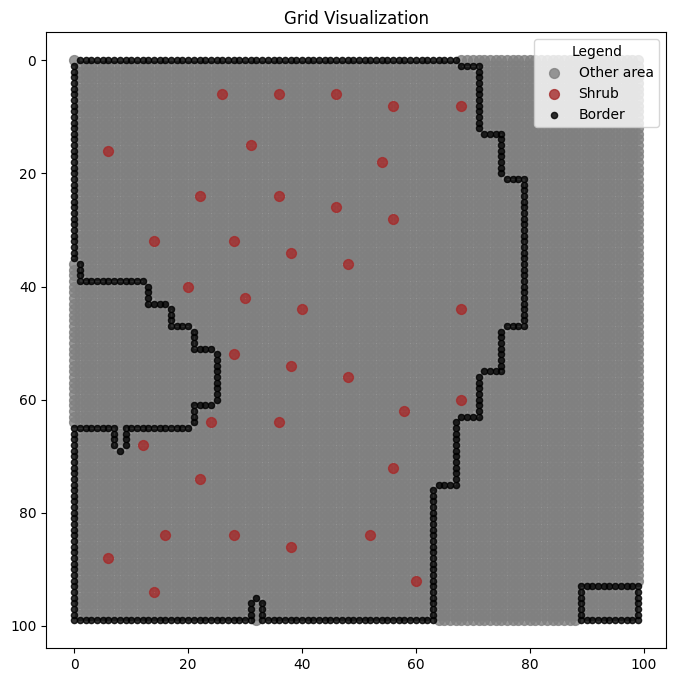

In [63]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces
import random
from perlin_noise import PerlinNoise
from scipy.spatial.distance import cdist
import cv2
import matplotlib.pyplot as plt
from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.colors as mcolors
import os

# Environment Class
class customSpatialEnv(gym.Env):
    def __init__(self, octave:float, grid_size:tuple=(100,100)):
        """
        Args:
            octave (float): octave value from range [1-2] for perlin noise
            grid_size (tuple): (w, h) of grid, defaults to (100, 100)
        """
        super(customSpatialEnv, self).__init__()

        # Create 100x100 grid
        self.grid_size = grid_size
        self.octave = octave
        self.max_attempts = 100000  # Maximum number of attempts
        self.attempt_counter = 0  # Tracks the number of attempts

        self.grid, self.planting_coordinates, self.distances = self._create_environment()

        # Plants: 1 for Tree, 2 for Shrub, 0 for No plant (added)
        self.plants = np.array([0, 1, 2])  # [No Plant, Tree, Shrub]

        # Action space: Use Box for percentage (horizontal, vertical) and plant type (no object, shrub, tree)
        self.action_space = spaces.Box(low=0.0, high=1.0, shape=(3,), dtype=np.float32)

        # Observation space: Dict containing the grid and distances (both horizontal and vertical)
        self.observation_space = spaces.Dict({
            "horizontal_distance": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32),  # Horizontal distance (left)
            "vertical_distance": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32),    # Vertical distance (top)
            "tree_proportion": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32),  # Proportion of trees
            "shrub_proportion": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32),  # Proportion of shrubs
            "good_tree_spot": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32),    # Whether the spot is good for planting a tree
            "border_score": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32)  
        })

        self.num_trees = 0
        self.num_shrubs = 0
        self.planted_tree_positions = []

    def reset(self, seed=None, options=None):
        """
        Reset the environment to its initial state.
        """
        super().reset(seed=seed)  # Ensure that we call the parent class reset for seeding

        # Recreate the environment (reinitialize grid, planting coordinates, and distances)
        self.grid, self.planting_coordinates, self.distances = self._create_environment()
        self.attempt_counter = 0

        # Start with the first planting coordinate if available, otherwise default to [0, 0] for distances
        if len(self.distances) > 0:
            initial_distances = self.distances[0]
        else:
            initial_distances = [0, 0]  # Handle case where no distances are available

        horizontal_distance, vertical_distance = initial_distances[1], initial_distances[0]

        # Ensure the distances are of type float32
        horizontal_distance = np.array([horizontal_distance], dtype=np.float32)
        vertical_distance = np.array([vertical_distance], dtype=np.float32)

        tree_proportion = np.array([0.0], dtype=np.float32)
        shrub_proportion = np.array([0.0], dtype=np.float32)
        good_tree_spot = np.array([0.0], dtype=np.float32)  # Initial boolean flag (False)
        border_score = np.array([0.0], dtype=np.float32)  # Initial boolean flag (False)

        # Initial observation
        return {
            "horizontal_distance": horizontal_distance,
            "vertical_distance": vertical_distance,
            "tree_proportion": tree_proportion,
            "shrub_proportion": shrub_proportion,
            "good_tree_spot": good_tree_spot,
            "border_score": border_score
        }, {}

    def step(self, action):
        """
        The step function takes a single action, which contains three parts:
        - action[0]: horizontal ratio (0-1).
        - action[1]: vertical ratio (0-1).
        - action[2]: plant type selector (0-1), now including No Plant.
        """

        self.attempt_counter += 1

        # Default value for reward (in case of termination due to exceeding max attempts)
        reward = 0  

        # If the number of attempts exceeds max_attempts, terminate the episode with a penalty
        if self.attempt_counter > self.max_attempts:
            reward = -50  # Apply a significant penalty for exceeding maximum attempts
            terminated = True
            return {
                "horizontal_distance": np.array([0.0], dtype=np.float32),
                "vertical_distance": np.array([0.0], dtype=np.float32),
                "tree_proportion": np.array([0.0], dtype=np.float32),
                "shrub_proportion": np.array([0.0], dtype=np.float32),
                "good_tree_spot": np.array([0.0], dtype=np.float32),
                "border_score": np.array([0.0], dtype=np.float32)
            }, reward, terminated, False, {}

        # Unpack the action
        horizontal_ratio = action[0]
        vertical_ratio = action[1]
        plant_type_selector = action[2]

        # Use the horizontal and vertical ratio to find the nearest planting coordinates
        horizontal_target = horizontal_ratio * self.grid_size[1]  # Scale to grid width
        vertical_target = vertical_ratio * self.grid_size[0]  # Scale to grid height

        # Find the closest coordinate to the generated ratio
        coord_index = np.argmin(np.sum(np.abs(self.planting_coordinates - [vertical_target, horizontal_target]), axis=1))

        # Calculate the difference between the target and the selected plantable coordinates
        selected_coord = self.planting_coordinates[coord_index]
        diff = np.linalg.norm(np.array([vertical_target, horizontal_target]) - np.array(selected_coord))

        # Penalize if the distance is greater than 0.5
        if diff > 20:
            reward = 0  # Apply a penalty for selecting a coordinate that is too far from any plantable spot
            terminated = False
            truncated = False
            return {
                "horizontal_distance": np.array([0.0], dtype=np.float32),
                "vertical_distance": np.array([0.0], dtype=np.float32),
                "tree_proportion": np.array([0.0], dtype=np.float32),
                "shrub_proportion": np.array([0.0], dtype=np.float32),
                "good_tree_spot": np.array([0.0], dtype=np.float32),
                "border_score": np.array([0.0], dtype=np.float32)
            }, reward, terminated, truncated, {}

        # Use the plant type selector to determine the plant type
        if plant_type_selector < 0.33:
            plant_type = 0  # No Plant (new option)
        elif plant_type_selector < 0.66:
            plant_type = 1  # Tree
        else:
            plant_type = 2  # Shrub

        # The rest of the planting logic if a valid spot is selected
        planting_coord = self.planting_coordinates[coord_index]

        if self.grid[planting_coord[0], planting_coord[1]] == 125:  # Plantable spot
            # Update the grid with the selected plant type (1: Tree, 2: Shrub)
            self.grid[planting_coord[0], planting_coord[1]] = self.plants[plant_type]

            if len(self.distances) > 0:  # Ensure there are distances to access
                horizontal_distance, vertical_distance = self.distances[min(coord_index, len(self.distances) - 1)]
            else:
                horizontal_distance, vertical_distance = 0.0, 0.0

            # Remove the planted coordinate from the list to avoid planting again in the same spot
            self.planting_coordinates = np.delete(self.planting_coordinates, coord_index, axis=0)
            self.distances = np.delete(self.distances, coord_index, axis=0)

            ####################################################################################
            ### Shrub Proportion and Tree proportion and reward mechanism
            #  Calculate tree and shrub proportions
            total_plants = self.num_trees + self.num_shrubs
            tree_proportion = self.num_trees / total_plants if total_plants > 0 else 0
            shrub_proportion = self.num_shrubs / total_plants if total_plants > 0 else 0
            balance_reward = 0

            # Update tree and shrub counts
            if self.plants[plant_type] == 1:
                self.num_trees += 1
                self.planted_tree_positions.append(planting_coord)  # Track tree positions
                if tree_proportion > 0.2:
                    balance_reward += 2

            elif self.plants[plant_type] == 2:
                self.num_shrubs += 1
                if shrub_proportion > 0.6:
                    balance_reward += 1

            ####################################################################################
            ### Good Tree Spot and Distance mechanism
            good_tree_spot = 1.0  # Assume the spot is good initially
            if plant_type == 1:  # Only check for trees
                for tree_pos in self.planted_tree_positions:
                    if np.array_equal(tree_pos, planting_coord):
                        continue
                    # Calculate the distance between the planted tree and all other trees
                    dist = np.linalg.norm(np.array(planting_coord) - np.array(tree_pos))
                    if dist < 50:  # If any tree is within 50 units, it's not a good spot
                        good_tree_spot = 0.0
                        break
            distance_reward = 0.5
            # Only apply reward for trees (plant_type == 1)
            if self.plants[plant_type] == 1:
                # Apply a reward based on how far the nearest tree is, capped at 50 units
                if good_tree_spot == 1.0:
                    distance_reward = 1  # Normalize reward (closer to 50 = higher reward)
                else:
                    distance_reward = 0

            ####################################################################################

            ### Border Score Segment

            # Retrieve the distances for the selected planting coordinate
            if len(self.distances) > 0:
                horizontal_distance, vertical_distance = self.distances[min(coord_index, len(self.distances) - 1)]
            else:
                horizontal_distance, vertical_distance = 0.0, 0.0

            border_score = 0
            if (abs(horizontal_distance - 0.5) + abs(vertical_distance - 0.5)) > 0.8:
                border_score = 1

            ####################################################################################

            ### Total reward Segment
            reward = 3 * balance_reward + 2 *distance_reward + border_score
            ####################################################################################

            if plant_type == 0:
            # No planting is done, but a small positive reward could be given to avoid excessive no-action use
                reward = 1

        else:
            # Penalize for trying to plant on a non-plantable spot
            reward = -1
            horizontal_distance, vertical_distance = 0.0, 0.0  # Set to zero if invalid action
            tree_proportion = self.num_trees / (self.num_trees + self.num_shrubs) if (self.num_trees + self.num_shrubs) > 0 else 0
            shrub_proportion = self.num_shrubs / (self.num_trees + self.num_shrubs) if (self.num_trees + self.num_shrubs) > 0 else 0
            good_tree_spot = 0.0

        # Ensure the distances are of type float32
        horizontal_distance = np.array([horizontal_distance], dtype=np.float32)
        vertical_distance = np.array([vertical_distance], dtype=np.float32)
        tree_proportion = np.array([tree_proportion], dtype=np.float32)
        shrub_proportion = np.array([shrub_proportion], dtype=np.float32)
        good_tree_spot = np.array([good_tree_spot], dtype=np.float32)
        border_score = np.array([border_score], dtype=np.float32)

        # Observation: the current state of the environment (grid, distances, and tree/shrub proportions)
        observation = {
            "horizontal_distance": horizontal_distance,
            "vertical_distance": vertical_distance,
            "tree_proportion": tree_proportion,
            "shrub_proportion": shrub_proportion,
            "good_tree_spot": good_tree_spot,
            "border_score": border_score
        }

        # Check if the episode should end (plant all possible spots)
        terminated = len(self.planting_coordinates) == 0

        # Truncated remains False
        truncated = False

        info = {
            'diff': diff  # Add diff to the info dictionary
        }

        return observation, reward, terminated, truncated, info


    def _create_environment(self):
        """
        Function to create a test environment
        Runs perlin noise, dithers
        Ensure that at least 7.5% is plantable
        Filters to ensure minimum 10 grid between all coordinates

        Returns:
            planting_grid (np.ndarray): self.grid_size grid of 0 for unplantable and 1 for plantable
            planting_coord (np.ndarray): (1, num_planting_coord) numpy array
        """ 
        while True:
            noise = PerlinNoise(octaves=self.octave, seed = random.randint(0, 50))
            width, height = self.grid_size

            # Create environment and dither
            perlin_env = np.array([[noise([i/height, j/width]) for j in range(width)] for i in range(height)])
            dithered_perlin_env = self._dither_environment(perlin_env)

            # Check density, more than 7.5% must be plantable
            planting_positions = np.argwhere(dithered_perlin_env == 1)
            planting_density = len(planting_positions) / len(dithered_perlin_env.flatten())

            # If planting density too low, recreate environment with a random grid
            if planting_density > 7.5/100:
                break

        planting_grid, planting_coords  = self._filter_environment(planting_positions)
        boundary = self._draw_and_return_boundary_only(dithered_perlin_env) #just remember to change the input accordingly
        distances, final_grid = self._create_distance_list_grid(planting_grid, boundary, planting_coords)

        return final_grid, planting_coords, distances

    def _dither_environment(self, perlin_env:np.ndarray):
        """
        Function to dither perlin environment using bayer matrix
        
        Args:
            perlin_env (np.ndarray): self.grid_size numpy array with random noise from perlin

        Returns:
            dithered_grid (np.ndarray): self.grid_size grid of 0 for unplantable and 1 for plantable
        """
        # 4x4 Normalised Bayer matrix
        bayer_matrix = np.array([
            [0, 8, 2, 10],
            [12, 4, 14, 6],
            [3, 11, 1, 9],
            [15, 7, 13, 5]
        ]) / 16.0  # Normalisation

        # Dither with Bayer Matrix
        bayer_tile_size = bayer_matrix.shape[0]  # Size of the Bayer matrix (4x4)
        dithered_grid = np.zeros_like(perlin_env)
        width, height = self.grid_size

        # Apply Bayer matrix
        for y in range(height):
            for x in range(width):
                bayer_value = bayer_matrix[y % bayer_tile_size, x % bayer_tile_size]
                dithered_grid[y, x] = 1 if perlin_env[y, x] > bayer_value else 0
        
        return dithered_grid

    def _filter_environment(self, planting_positions:np.ndarray):
        """
        Function to remove close coordinates, ensuring all coordinates are at least 10 apart
        All coordinates within 5 grid of the environment borders are also remove as a buffer effect
        
        Args:
            planting_positions (np.ndarray): numpy array of all plantable coordinates from dithering algorithm

        Returns:
            final_grid (np.ndarray): self.grid_size grid of 0 for unplantable and 1 for plantable
            final_planting_coordinates (np.ndarray): (1, num_planting_coord) numpy array        
        """
        min_distance = 10
        filtered_planting_positions = planting_positions.copy()
        
        # Calculate elucidean distance between coordinates
        distances = cdist(filtered_planting_positions, filtered_planting_positions)

        # Keep a numpy array of all filtered position and assume is true
        keep_array = np.ones(len(filtered_planting_positions), dtype=bool)

        # Check for points that are too close
        for i in range(len(filtered_planting_positions)):
            plant_coordinate = filtered_planting_positions[i]
            # Boundary of 5 pixel to prevent tress on the edge
            if plant_coordinate[0] <= 5 or plant_coordinate[0] >= (self.grid_size[0] -5):
                keep_array[i] = False
            
            if plant_coordinate[1] <= 5 or plant_coordinate[1] >= (self.grid_size[1] -5):
                keep_array[i] = False

            # Only consider points that haven't been removed
            if keep_array[i]:  
                for j in range(i + 1, len(filtered_planting_positions)):
                    if distances[i, j] < min_distance:
                        # Remove the second point if it's too close
                        keep_array[j] = False


        final_planting_coordinates = filtered_planting_positions[keep_array]
        # Final grid (All 0s)
        final_grid = np.zeros(self.grid_size)
        # Update grid with planting position
        for coordinates in final_planting_coordinates:
            final_grid[coordinates[0], coordinates[1]] = 1
        return final_grid, final_planting_coordinates

    def _draw_and_return_boundary_only(self, input_grid, threshold_value=128, contour_value=255, dilation_iterations=3):
        '''
        Draws a precise boundary around all yellow regions in the unfiltered grid and returns an array with only the boundary values.
        
        Parameters:
        - threshold_value: int -- the threshold value to segment the yellow area (default: 128).
        - contour_value: int -- the value to set for the boundary pixels in the array (default: 255 for white).
        - dilation_iterations: int -- number of iterations for dilating the image to smooth out the areas (default: 3).
        
        Returns:
        - boundary_array: np.array -- the NumPy array containing only the boundary values.
        '''
        
        # Access the unfiltered grid from the environment
        unfiltered_grid = input_grid
        # Normalize the array to the range 0-255 (assuming it's a float array in range 0-1)
        normalized_image = (unfiltered_grid * 255).astype(np.uint8)

        # Apply a threshold to isolate the yellow area
        _, thresh = cv2.threshold(normalized_image, threshold_value, 255, cv2.THRESH_BINARY)

        # Optionally dilate the thresholded image to fill in gaps in the contours
        if dilation_iterations > 0:
            kernel = np.ones((3, 3), np.uint8)
            thresh = cv2.dilate(thresh, kernel, iterations=dilation_iterations)

        # Find contours on the thresholded image (we only want external contours)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Create an empty array (same shape as normalized_image) to store only the boundary
        boundary_array = np.zeros_like(normalized_image)

        # Draw the contours on the boundary array (without the original regions, only the contours)
        cv2.drawContours(boundary_array, contours, -1, contour_value, thickness=1)

        # Optionally show the boundary array for visualization (you can remove this for efficiency in the environment)
        # plt.imshow(boundary_array, cmap='gray')
        # plt.show()

        # Return the boundary array for further use within the environment
        return boundary_array
    
    def _set_array_borders(self, arr, border_thickness = 5, value = 0):
        '''
        Sets the borders of the class's array to a specified value.
        
        Parameters:
        - border_thickness: int -- the thickness of the border to modify.
        - value: int or float -- the value to set for the borders.
        
        Modifies:
        - self.grid or any other attribute that stores the grid.
        '''
        
        # Assuming the class has a grid or unfiltered grid attribute, modify the array in place.

        # Set top and bottom borders
        arr[:border_thickness, :] = value  # Top border
        arr[-border_thickness:, :] = value  # Bottom border
        
        # Set left and right borders
        arr[:, :border_thickness] = value  # Left border
        arr[:, -border_thickness:] = value  # Right border
        
        # You can also return the modified grid if necessary
        return arr
    
    def _create_distance_list_grid(self, grid, boundary, coordinates):
        '''
        Create the list of distances of each node from the bouyndary values
        
        Parameters:
        - grid: int -- the thickness of the border to modify.
        - boundary: int or float -- the value to set for the borders.
        
        Modifies:
        - self.grid or any other attribute that stores the grid.
        '''

        directions = [
            (-1, 0),  #U
            (1, 0),  #D
            (0, -1), #L
            (0, 1)   #R
        ]

        distances = []
        testing_copy = np.copy(boundary)

        
        for coords in coordinates:
            if grid[coords[0], coords[1]] != 1:
                print("Not Seed position")
                continue

            starting_x, starting_y = coords[1], coords[0]
            testing_copy[coords[0], coords[1]] = 125

            temp_distances = []
            for x, y in directions:
                step = 0
                current_x, current_y = starting_x, starting_y
                while 0 <= current_x < self.grid_size[0] and 0 <= current_y < self.grid_size[1]:
                    step += 1
                    current_x += x
                    current_y += y
                    if boundary[current_x, current_y] == 255:
                        temp_distances.append(step)
                        break
                    if current_x == 0 or current_x == 99 or current_y == 0 or current_y == 99:
                        temp_distances.append(step)
                        break

            horizontal_distance_L = temp_distances[2]/(temp_distances[2] + temp_distances[3])
            horizontal_distance_R = temp_distances[3]/(temp_distances[2] + temp_distances[3])

            vertical_distance_D = temp_distances[1]/(temp_distances[0] + temp_distances[1])
            vertical_distance_U = temp_distances[0]/(temp_distances[0] + temp_distances[1])
            distances.append([vertical_distance_U, horizontal_distance_L])
        return distances, testing_copy

    
    
import matplotlib.patches as mpatches
    
def load_model(env):
    global model
    model = PPO("MultiInputPolicy", env, verbose=1, n_steps=2048, gamma=0.99, learning_rate=0.0003, ent_coef=0.05)
    return model

# Train the model without saving automatically
def train_model(env):
    global model
    model.learn(total_timesteps=100000)
    return model

# Function to render one episode and test the model
def render_episode(env, model):
    obs, _ = env.reset()
    step = 0
    while True:
        action, _states = model.predict(obs, deterministic=False)
        action, _states = model.predict(obs, deterministic=False)

        # Add some noise to the action to encourage exploration
        noise = np.random.normal(0, 0.1, size=action.shape)  # Adjust noise level as needed
        action += noise
        action = np.clip(action, 0, 1)
        obs, reward, terminated, truncated, info = env.step(action)
        step += 1
        diff = info.get('diff', None)  # Get the diff from the info dictionary
        # print(f"Step {step}: Reward = {reward}, Action = {action}, Diff = {diff}")

        if terminated or truncated:
            print(f"Episode finished after {step} steps")
            break

    return model

def load_pretrained_model(model_path):
    """
    Load a pretrained PPO model from a specified path.
    """
    if not os.path.exists(model_path):
        raise ValueError(f"Model path {model_path} does not exist.")
    
    model = PPO.load(model_path)
    print(f"Loaded model from {model_path}")
    return model


def generate_new_placement(env, model):
    """
    Generate a new grid and use the model to place trees, shrubs, or no plant until all plantable spots are used.
    """
    obs, _ = env.reset()
    step = 0

    while True:
        action, _states = model.predict(obs, deterministic=False)
        noise = np.random.normal(0, 0.05, size=action.shape)
        randomized_action = np.clip(action + noise, 0, 1)
        obs, reward, terminated, truncated, info = env.step(randomized_action)
        
        step += 1

        if terminated or truncated:
            print(f"Episode finished after {step} steps")
            break

    return env.grid  # Only return the grid


def extract_tree_shrub_placements(grid):
    """
    Extracts the tree and shrub placements from the final grid.
    
    Args:
        grid (np.ndarray): The final grid after placement.
    
    Returns:
        trees (list of tuple): List of coordinates of tree placements.
        shrubs (list of tuple): List of coordinates of shrub placements.
    """
    trees = list(zip(*np.where(grid == 1)))
    shrubs = list(zip(*np.where(grid == 2)))
    return trees, shrubs


# Main function to load model and generate new placement
def createGrid(model_path):
    env = customSpatialEnv(octave=1.5, grid_size=(100, 100))
    model = load_pretrained_model(model_path)
    final_grid = generate_new_placement(env, model)
    return final_grid


# Visualization (optional, for debugging)
def visualize_grid_with_circles(grid):
    plt.figure(figsize=(8, 8))
    marker_styles = {
        0: {'color': 'gray', 'label': 'Other area', 'size': 50},
        125: {'color': 'yellow', 'label': 'Plantable', 'size': 50},
        1: {'color': 'green', 'label': 'Tree', 'size': 50},
        2: {'color': 'brown', 'label': 'Shrub', 'size': 50},
        3: {'color': 'blue', 'label': 'No Plant', 'size': 50},
        255: {'color': 'black', 'label': 'Border', 'size': 20},
    }

    for value, style in marker_styles.items():
        indices = np.argwhere(grid == value)
        if len(indices) > 0:
            plt.scatter(indices[:, 1], indices[:, 0], color=style['color'], label=style['label'], s=style['size'], alpha=0.8)

    plt.gca().invert_yaxis()
    plt.legend(title="Legend", loc='upper right')
    plt.title("Grid Visualization")
    plt.grid(False)
    plt.show()


if __name__ == "__main__":
    # Specify the path to the pretrained model directory
    model_path = "./models/23rd.zip"
    final_grid = createGrid(model_path)
    trees, shrubs = extract_tree_shrub_placements(final_grid)
    print("Trees placed at:", trees)
    print("Shrubs placed at:", shrubs)

    # Optional visualization
    visualize_grid_with_circles(final_grid)


In [23]:
print(final_grid)

[[  0 255 255 ...   0   0   0]
 [255   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]
 ...
 [255   0   0 ...   0   0 255]
 [255   0   0 ...   0   0 255]
 [255 255 255 ... 255 255 255]]


In [44]:
for i in range(4):
    model_path = "./models/23rd.zip"
    final_grid = createGrid(model_path)
    trees, shrubs = extract_tree_shrub_placements(final_grid)
    print("Trees placed at:", trees)
    print("Shrubs placed at:", shrubs)

Loaded model from ./models/23rd.zip
Episode finished after 553 steps
Trees placed at: [(70, 6)]
Shrubs placed at: [(6, 78), (6, 90), (8, 64), (16, 72), (16, 92), (26, 74), (26, 84), (26, 94), (32, 56), (34, 66), (36, 76), (36, 86), (42, 94), (44, 70), (45, 81), (52, 90), (54, 70), (56, 80), (60, 20), (62, 88), (66, 78), (70, 18), (70, 94), (74, 84), (76, 28), (76, 72), (80, 6), (80, 16), (80, 92), (84, 80), (86, 26), (88, 68), (90, 6), (90, 90), (92, 36), (94, 78)]
Loaded model from ./models/23rd.zip
Episode finished after 509 steps
Trees placed at: [(28, 76), (50, 6)]
Shrubs placed at: [(6, 6), (6, 26), (6, 36), (6, 46), (6, 56), (6, 66), (8, 76), (8, 88), (15, 11), (15, 21), (15, 31), (15, 51), (16, 62), (16, 94), (18, 74), (20, 84), (24, 6), (24, 16), (24, 36), (24, 46), (24, 56), (26, 66), (26, 94), (32, 86), (33, 21), (34, 6), (34, 32), (34, 42), (34, 54), (36, 64), (38, 74), (38, 94), (44, 84), (48, 72), (48, 94), (54, 82), (58, 94), (60, 72), (68, 94), (70, 74), (72, 64), (74, 8

In [ ]:
## Action space will be OC1 OC2 OC3 IC1 IC2 IC3, actions will be masked according to the input of the canopy count
# Observation Space
#   will be the closest other type of tree, if within a certain radius
#   The Count of the intermediate/ closed canopy types
#   Available actions, the action masking
#   The theme, road or walkway
#   
### Does the position represent something or should I be able to determine these without any other information and are able to just iterate trough the list of coordinates?
# Deemed as an open question that can be asked following development

## Inputs necessary
# Plants selection with the count
# Grid with planting coordinates

## Output following that masking and the radius of each tree at each of the coordinates



In [41]:
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from gymnasium import spaces
import gymnasium as gym
import os

# Define the positions (input) and actions (output) for training
positions = [(74, 34), (86, 38), (10, 10), (20, 20), (30, 30)]
action_labels = ["OC1", "OC2", "OC3", "IC1", "IC2", "IC3"]

# Mock environment to train on positions with action masking
class PositionActionEnv(gym.Env):
    def __init__(self, positions, allowed_actions=None):
        super(PositionActionEnv, self).__init__()
        self.positions = positions
        self.allowed_actions = allowed_actions or [0, 1, 2, 3, 4, 5]  # Default: all actions allowed
        self.current_index = 0
        self.num_positions = len(positions)

        # Count OC and IC actions based on allowed actions
        self.oc_count = sum(1 for a in self.allowed_actions if a in [0, 1, 2])  # OC actions are 0, 1, 2
        self.ic_count = sum(1 for a in self.allowed_actions if a in [3, 4, 5])  # IC actions are 3, 4, 5

        # Observation space includes allowed actions mask, OC count, and IC count
        self.observation_space = spaces.Dict({
            "allowed_actions_mask": spaces.Box(low=0, high=1, shape=(6,), dtype=np.int32),
            "oc_count": spaces.Box(low=0, high=3, shape=(1,), dtype=np.int32),
            "ic_count": spaces.Box(low=0, high=3, shape=(1,), dtype=np.int32)
        })

        # Action space is discrete with 6 options (OC1, OC2, OC3, IC1, IC2, IC3)
        self.action_space = spaces.Discrete(6)

    def reset(self, seed=None, options=None):
        # Accept seed argument for compatibility with stable-baselines3
        super().reset(seed=seed)
        self.current_index = 0
        return self._get_observation(), {}

    def _get_observation(self):
        # Create allowed actions mask based on allowed actions
        allowed_actions_mask = np.zeros(6, dtype=np.int32)
        allowed_actions_mask[self.allowed_actions] = 1
        oc_count = np.array([self.oc_count], dtype=np.int32)
        ic_count = np.array([self.ic_count], dtype=np.int32)
        
        # Return observation dictionary
        return {
            "allowed_actions_mask": allowed_actions_mask,
            "oc_count": oc_count,
            "ic_count": ic_count
        }

    def step(self, action):
        # Check if the action is allowed; if not, apply a penalty
        if action not in self.allowed_actions:
            reward = -10  # Large penalty for invalid action
        else:
            reward = np.random.choice([1, -1])

        # Track the current action
        self.current_index += 1
        done = self.current_index >= self.num_positions

        return self._get_observation() if not done else self._get_observation(), reward, done, False, {}

# Helper function to set up the environment with allowed actions
def create_env_with_action_masking(positions, allowed_actions):
    return DummyVecEnv([lambda: PositionActionEnv(positions, allowed_actions=allowed_actions)])

# Define and train the model
def train_and_save_model(positions, allowed_actions, model_path="ppo_position_model"):
    env = create_env_with_action_masking(positions, allowed_actions)
    model = PPO("MultiInputPolicy", env, verbose=1)
    model.learn(total_timesteps=5000)  # Adjust as needed for better training
    model.save(model_path)
    return model

# Load model and predict actions with masking
def load_model_and_predict(model_path, positions, allowed_actions):
    model = PPO.load(model_path)
    env = create_env_with_action_masking(positions, allowed_actions)
    actions_taken = []

    for position in positions:
        obs = env.reset()
        action, _ = model.predict(obs, deterministic=True)
        actions_taken.append(action[0])

    return actions_taken

# Set up positions and allowed actions for training and prediction
allowed_actions_train = [0, 1, 4]  # Example: only allow OC1, OC2, and IC1 during training
allowed_actions_predict = [0, 2, 3]  # Example: allow OC1, OC3, and IC1 for prediction

# Step 1: Train and save the model with specific allowed actions
train_and_save_model(positions, allowed_actions_train, model_path="./models/treeType")

# Step 2: Load the model and predict actions with different allowed actions
actions_taken = load_model_and_predict("./models/treeType", positions, allowed_actions_predict)

# Print the actions taken at each position
print("Actions taken at each position:")
for pos, action in zip(positions, actions_taken):
    print(f"Position {pos}: {action_labels[action]}")


Using cpu device
-----------------------------
| time/              |      |
|    fps             | 2762 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 2012        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.021445367 |
|    clip_fraction        | 0.693       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.77       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0003      |
|    loss                 | 48.3        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0907     |
|    value_loss           | 154         |
-----------------------------------------
-----------------

In [61]:
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from gymnasium import spaces
import gymnasium as gym
import os

# Define the positions (input) and actions (output) for training
positions = [(74, 34), (86, 38), (10, 10), (20, 20), (30, 30)]
action_labels = ["OC1", "OC2", "OC3", "IC1", "IC2", "IC3"]

# Mock environment to train on positions with action masking
class PositionActionEnv(gym.Env):
    def __init__(self, positions, allowed_actions=None):
        super(PositionActionEnv, self).__init__()
        self.positions = positions
        self.allowed_actions = allowed_actions or [0, 1, 2, 3, 4, 5]  # Default: all actions allowed
        self.current_index = 0
        self.num_positions = len(positions)

        # Count OC and IC actions based on allowed actions
        self.oc_count = sum(1 for a in self.allowed_actions if a in [0, 1, 2])  # OC actions are 0, 1, 2
        self.ic_count = sum(1 for a in self.allowed_actions if a in [3, 4, 5])  # IC actions are 3, 4, 5

        # Observation space includes allowed actions mask, OC count, and IC count
        self.observation_space = spaces.Dict({
            "allowed_actions_mask": spaces.Box(low=0, high=1, shape=(6,), dtype=np.int32),
            "oc_count": spaces.Box(low=0, high=3, shape=(1,), dtype=np.int32),
            "ic_count": spaces.Box(low=0, high=3, shape=(1,), dtype=np.int32)
        })

        # Action space is discrete with 6 options (OC1, OC2, OC3, IC1, IC2, IC3)
        self.action_space = spaces.Discrete(6)

    def reset(self, seed=None, options=None):
        # Accept seed argument for compatibility with stable-baselines3
        model_path = "./models/23rd.zip"
        final_grid = createGrid(model_path)
        trees, shrubs = extract_tree_shrub_placements(final_grid)
        print("Trees placed at:", trees)
        print("Shrubs placed at:", shrubs)
        super().reset(seed=seed)
        self.current_index = 0
        return self._get_observation(), {}

    def _get_observation(self):
        # Create allowed actions mask based on allowed actions
        allowed_actions_mask = np.zeros(6, dtype=np.int32)
        allowed_actions_mask[self.allowed_actions] = 1
        oc_count = np.array([self.oc_count], dtype=np.int32)
        ic_count = np.array([self.ic_count], dtype=np.int32)
        
        # Return observation dictionary
        return {
            "allowed_actions_mask": allowed_actions_mask,
            "oc_count": oc_count,
            "ic_count": ic_count
        }

    def step(self, action):
        # Check if the action is allowed; if not, apply a penalty
        if action not in self.allowed_actions:
            reward = -10  # Large penalty for invalid action
        else:
            reward = np.random.choice([1, -1])

        # Track the current action
        self.current_index += 1
        done = self.current_index >= self.num_positions

        return self._get_observation() if not done else self._get_observation(), reward, done, False, {}

# Helper function to set up the environment with allowed actions
def create_env_with_action_masking(positions, allowed_actions):
    return DummyVecEnv([lambda: PositionActionEnv(positions, allowed_actions=allowed_actions)])

# Define and train the model
def train_and_save_model(positions, allowed_actions, model_path="ppo_position_model"):
    env = create_env_with_action_masking(positions, allowed_actions)
    model = PPO("MultiInputPolicy", env, verbose=1)
    model.learn(total_timesteps=5000)  # Adjust as needed for better training
    model.save(model_path)
    return model

# Load model and predict actions with masking
def load_model_and_predict(model_path, positions, allowed_actions):
    model = PPO.load(model_path)
    env = create_env_with_action_masking(positions, allowed_actions)
    actions_taken = []

    for position in positions:
        obs = env.reset()
        action, _ = model.predict(obs, deterministic=True)
        actions_taken.append(action[0])

    return actions_taken

# Set up positions and allowed actions for training and prediction
allowed_actions_train = [0, 1, 4]  # Example: only allow OC1, OC2, and IC1 during training
allowed_actions_predict = [0, 2, 3]  # Example: allow OC1, OC3, and IC1 for prediction

# Step 1: Train and save the model with specific allowed actions
train_and_save_model(positions, allowed_actions_train, model_path="./models/treeType")

# Step 2: Load the model and predict actions with different allowed actions
actions_taken = load_model_and_predict("./models/treeType", positions, allowed_actions_predict)

# Print the actions taken at each position
print("Actions taken at each position:")
for pos, action in zip(positions, actions_taken):
    print(f"Position {pos}: {action_labels[action]}")

Using cpu device
Loaded model from ./models/23rd.zip
Episode finished after 878 steps
Trees placed at: [(6, 38), (36, 60), (48, 68), (84, 16), (90, 6), (90, 42)]
Shrubs placed at: [(6, 14), (8, 48), (16, 20), (16, 32), (16, 84), (16, 94), (20, 52), (26, 26), (26, 94), (28, 16), (32, 48), (36, 92), (38, 34), (42, 46), (46, 26), (48, 36), (48, 56), (54, 18), (56, 8), (60, 56), (60, 68), (64, 16), (66, 26), (66, 46), (70, 6), (72, 34), (72, 56), (74, 16), (76, 44), (78, 26), (80, 6), (82, 36), (84, 52), (88, 26), (88, 92), (94, 16)]
Loaded model from ./models/23rd.zip
Episode finished after 492 steps
Trees placed at: [(84, 94), (92, 20)]
Shrubs placed at: [(6, 22), (6, 46), (8, 8), (8, 56), (16, 16), (16, 28), (16, 40), (18, 6), (26, 34), (28, 6), (32, 16), (34, 26), (42, 16), (44, 28), (44, 92), (48, 6), (52, 16), (52, 80), (54, 26), (54, 90), (58, 6), (60, 72), (62, 18), (62, 82), (64, 28), (64, 92), (68, 8), (70, 70), (72, 20), (74, 90), (76, 32), (78, 10), (80, 64), (80, 74), (82, 22)

KeyboardInterrupt: 

In [64]:
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from gymnasium import spaces
import gymnasium as gym
import os

# Define action labels for reference
action_labels = ["OC1", "OC2", "OC3", "IC1", "IC2", "IC3"]

# Mock environment to train on positions with action masking
class PositionActionEnv(gym.Env):
    def __init__(self, positions, allowed_actions=None):
        super(PositionActionEnv, self).__init__()
        self.positions = positions
        self.allowed_actions = allowed_actions or [0, 1, 2, 3, 4, 5]  # Default: all actions allowed
        self.current_index = 0
        self.num_positions = len(positions)

        # Count OC and IC actions based on allowed actions
        self.oc_count = sum(1 for a in self.allowed_actions if a in [0, 1, 2])  # OC actions are 0, 1, 2
        self.ic_count = sum(1 for a in self.allowed_actions if a in [3, 4, 5])  # IC actions are 3, 4, 5

        # Observation space includes allowed actions mask, OC count, and IC count
        self.observation_space = spaces.Dict({
            "allowed_actions_mask": spaces.Box(low=0, high=1, shape=(6,), dtype=np.int32),
            "oc_count": spaces.Box(low=0, high=3, shape=(1,), dtype=np.int32),
            "ic_count": spaces.Box(low=0, high=3, shape=(1,), dtype=np.int32)
        })

        # Action space is discrete with 6 options (OC1, OC2, OC3, IC1, IC2, IC3)
        self.action_space = spaces.Discrete(6)

        # Initialize grid and positions using the old model
        self._initialize_grid()

    def _initialize_grid(self):
        # Load model and generate new grid with tree and shrub positions
        model_path = "./models/23rd.zip"
        final_grid = createGrid(model_path)
        self.trees, self.shrubs = extract_tree_shrub_placements(final_grid)
        self.positions = self.trees + self.shrubs  # Combine tree and shrub positions
        self.num_positions = len(self.positions)
        self.current_index = 0
        print("Generated new grid with tree and shrub positions.")

    def reset(self, seed=None, options=None):
        # Reset the grid only after all positions have been used in the previous episode
        if self.current_index >= self.num_positions:
            self._initialize_grid()

        # Reset the position index to start the planting process again
        self.current_index = 0
        super().reset(seed=seed)
        return self._get_observation(), {}

    def _get_observation(self):
        # Create allowed actions mask based on allowed actions
        allowed_actions_mask = np.zeros(6, dtype=np.int32)
        allowed_actions_mask[self.allowed_actions] = 1
        oc_count = np.array([self.oc_count], dtype=np.int32)
        ic_count = np.array([self.ic_count], dtype=np.int32)
        
        # Return observation dictionary
        return {
            "allowed_actions_mask": allowed_actions_mask,
            "oc_count": oc_count,
            "ic_count": ic_count
        }

    def step(self, action):
        # Check if the action is allowed; if not, apply a penalty
        if action not in self.allowed_actions:
            reward = -10  # Large penalty for invalid action
        else:
            reward = np.random.choice([1, -1])

        # Track the current action
        self.current_index += 1
        done = self.current_index >= self.num_positions

        return self._get_observation(), reward, done, False, {}

# Helper function to set up the environment with allowed actions
def create_env_with_action_masking(positions, allowed_actions):
    return DummyVecEnv([lambda: PositionActionEnv(positions, allowed_actions=allowed_actions)])

# Define and train the model
def train_and_save_model(positions, allowed_actions, model_path="ppo_position_model"):
    env = create_env_with_action_masking(positions, allowed_actions)
    model = PPO("MultiInputPolicy", env, verbose=1)
    model.learn(total_timesteps=5000)  # Adjust as needed for better training
    model.save(model_path)
    return model

# Load model and predict actions with masking
def load_model_and_predict(model_path, positions, allowed_actions):
    model = PPO.load(model_path)
    env = create_env_with_action_masking(positions, allowed_actions)
    actions_taken = []

    for position in positions:
        obs = env.reset()
        action, _ = model.predict(obs, deterministic=True)
        actions_taken.append(action[0])

    return actions_taken

# Set up positions and allowed actions for training and prediction
allowed_actions_train = [0, 1, 4]  # Example: only allow OC1, OC2, and IC1 during training
allowed_actions_predict = [0, 2, 3]  # Example: allow OC1, OC3, and IC1 for prediction

# Step 1: Train and save the model with specific allowed actions
train_and_save_model(positions, allowed_actions_train, model_path="./models/treeType")

# Step 2: Load the model and predict actions with different allowed actions
actions_taken = load_model_and_predict("./models/treeType", positions, allowed_actions_predict)

# Print the actions taken at each position
print("Actions taken at each position:")
for pos, action in zip(positions, actions_taken):
    print(f"Position {pos}: {action_labels[action]}")


Loaded model from ./models/23rd.zip
Episode finished after 701 steps
Generated new grid with tree and shrub positions.
Using cpu device
Loaded model from ./models/23rd.zip
Episode finished after 690 steps
Generated new grid with tree and shrub positions.
Loaded model from ./models/23rd.zip
Episode finished after 415 steps
Generated new grid with tree and shrub positions.
Loaded model from ./models/23rd.zip
Episode finished after 643 steps
Generated new grid with tree and shrub positions.
Loaded model from ./models/23rd.zip
Episode finished after 591 steps
Generated new grid with tree and shrub positions.
Loaded model from ./models/23rd.zip
Episode finished after 575 steps
Generated new grid with tree and shrub positions.
Loaded model from ./models/23rd.zip
Episode finished after 733 steps
Generated new grid with tree and shrub positions.
Loaded model from ./models/23rd.zip
Episode finished after 300 steps
Generated new grid with tree and shrub positions.
Loaded model from ./models/23rd

One problem that I realise is that the model is always going to just select one species and never try for diversity lol